In [1]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import numpy as np
import matplotlib.pyplot as plt

In [2]:
dirs = {
    'train': 'data/COVID-19_Radiography_Dataset/train',
    'val': 'data/COVID-19_Radiography_Dataset/val',
    'test': 'data/COVID-19_Radiography_Dataset/test'
}

train_set = datasets.ImageFolder(root=dirs['train'], transform=transforms.ToTensor())
val_set = datasets.ImageFolder(root=dirs['val'], transform=transforms.ToTensor())
test_set = datasets.ImageFolder(root=dirs['test'], transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_set, batch_size=16, shuffle=True, num_workers=2)

In [3]:
train_set.classes

['covid_19', 'lung_opacity', 'normal', 'pneumonia']

In [4]:
train_set.class_to_idx

{'covid_19': 0, 'lung_opacity': 1, 'normal': 2, 'pneumonia': 3}

In [5]:
print(f'Number of Images in Train Set: {len(train_set)}')
print(f'Number of Images in Validation Set: {len(val_set)}')
print(f'Number of Images in Test Set: {len(test_set)}')

Number of Images in Train Set: 20685
Number of Images in Validation Set: 240
Number of Images in Test Set: 240


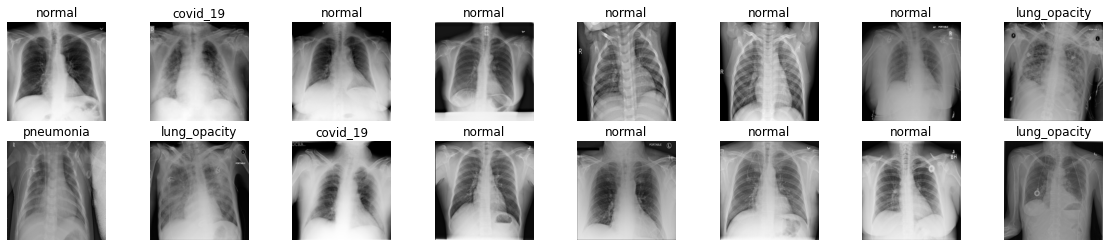

In [6]:
images, labels = next(iter(train_loader))
images = images.numpy()

fig = plt.figure(figsize=(20, 4))
for i in np.arange(16):
    ax = fig.add_subplot(2, 8, i+1)
    ax.axis('off')
    image = np.squeeze(np.transpose(images[i], (1, 2, 0)))
    ax.imshow(image)
    ax.set_title(train_set.classes[labels[i].item()])

plt.show()
fig.savefig('outputs/images/samples.png', bbox_inches='tight')
plt.close()

In [7]:
freq_train = torch.as_tensor(train_set.targets).bincount()
freq_val = torch.as_tensor(val_set.targets).bincount()
freq_test = torch.as_tensor(test_set.targets).bincount()
freq_all = freq_train + freq_test + freq_val

In [8]:
def log_freq(dset, dfreq):
    for c, i in dset.class_to_idx.items():
        print(f'Number of {c.capitalize()} X-Rays: {dfreq[i].item()}')

In [9]:
print('========== Train Set ==========')
log_freq(train_set, freq_train)
print('======== Validation Set ========')
log_freq(val_set, freq_val)
print('=========== Test Set ===========')
log_freq(test_set, freq_test)

========== Train Set ==========
Number of Covid_19 X-Rays: 3496
Number of Lung_opacity X-Rays: 5892
Number of Normal X-Rays: 10072
Number of Pneumonia X-Rays: 1225
======== Validation Set ========
Number of Covid_19 X-Rays: 60
Number of Lung_opacity X-Rays: 60
Number of Normal X-Rays: 60
Number of Pneumonia X-Rays: 60
=========== Test Set ===========
Number of Covid_19 X-Rays: 60
Number of Lung_opacity X-Rays: 60
Number of Normal X-Rays: 60
Number of Pneumonia X-Rays: 60


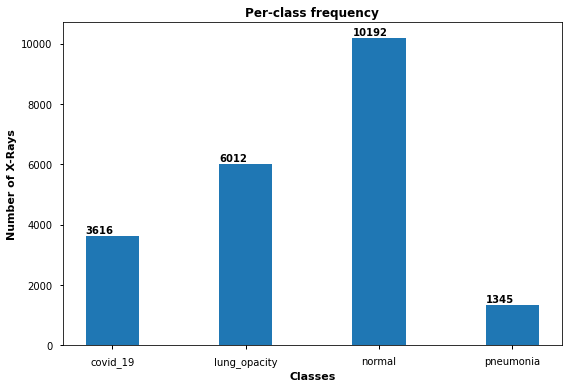

In [10]:
plt.style.use('seaborn-notebook')

plt.bar(train_set.classes, freq_all.numpy(), width=0.4)

for i, v in enumerate(freq_all.numpy()):
    plt.text(i-.2, v+100, str(v), fontweight='bold')

plt.xlabel('Classes', fontweight='bold')
plt.ylabel('Number of X-Rays', fontweight='bold')
plt.title('Per-class frequency', fontweight='bold')

plt.tight_layout()
plt.savefig('outputs/images/class_freq.png')

plt.show()
plt.close()